In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## REGRESSION MODELS EVALUATION METHODS (METRICS)

There are [several metrics you can use to evaluate your regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the following.

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [2]:
# Import the Boston housing dataset of SKlearn - built in regression dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Covert it to a pandas dataframe - for better inspection

# take the data key, and label the columns
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])

# create a target column in df by using target values from dataset
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### 1. R^2 score (coefficient of determination)

gives us a quick insight on how our models predictions are to close to the true predictions

Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.

In [6]:
model.score(X_test,y_test)

0.8654448653350507

#### For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

### 2. Mean Absolute Error (MAE)

A model's mean absolute error can be calculated with Scikit-Learn's [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function.

In [8]:
# Compare true labels with predicted labels
# y_test --> true labels

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

# MAE finds the differences between actual values and predicted values, then it
# Converts all differences to +ve (absolute), adds them and averages it.

2.136382352941176

Our model achieves an MAE of 2.203. This means, on average our models predictions are +-2.203 units away from the actual value.

In [11]:
df = pd.DataFrame(
    data={"actual values":y_test,
         "predicted values":y_preds
         })
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


Depending what problem you're working on, having a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

In [18]:
plt.style.use("seaborn")

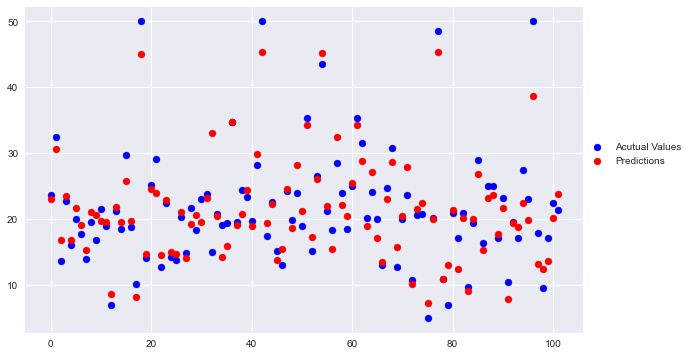

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

# np.arange() - Return evenly spaced values within a given interval.
x = np.arange(0,len(df),1)

# scatter(x,y) --> x and y must be of equal length
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predicted values"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

### 3. Mean Squared Error (MSE) 

We can calculate it with Scikit-Learn's [mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [21]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

# MSE finds the differences between actual values and predicted values, then it
# Squares all the differences, adds them and averages it. 

9.867437068627442

MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

In [22]:
# -----------------------------------------------------

#### which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
     * Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
     * Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

**Note:** What we've covered here is only a handful of potential metrics you can use to evaluate your models. These are **main ones** and they are **enough for now.** 

If you're after a complete list, check out the [Scikit-Learn metrics and scoring documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).